# Demographic Data Analyzer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
header = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]
df = pd.read_csv("adult.data", header=None, names = header)
desfase = (0.2, 0, 0, 0, 0)

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## How many people of each race are represented in this dataset?

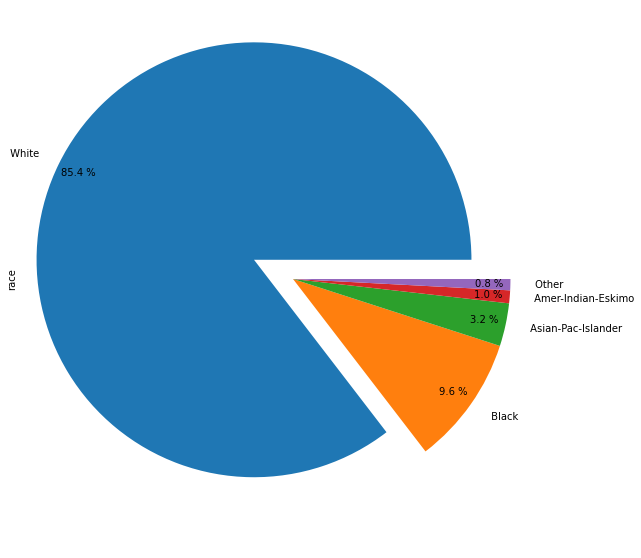

In [7]:
df["race"].value_counts().plot.pie(figsize=(10, 10),autopct="%0.1f %%", pctdistance= 0.9, explode=desfase)

## What is the average age of men?

In [10]:
df.loc[df["sex"]== " Male", "age"].mean()

39.43354749885268

## What is the percentage of people who have a Bachelor's degree?

In [13]:
df.loc[(df["salary"] == " >50K")&(df["sex"]== " Male")].shape[0]

6662

In [14]:
  df["salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [23]:
print(round(df.loc[df["education"] == " Bachelors"].shape[0]/df.shape[0]*100,2),"%")

16.45 %


## What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [33]:
print(round(df.loc[((df["education"] == " Bachelors") | (df["education"] == " Masters") | (df["education"] == " Doctorate")) & (df["salary"] == " >50K")].shape[0]*100/df.shape[0],2),"%")

10.71 %


## What percentage of people without advanced education make more than 50K?

In [40]:
print(round(df.loc[~((df["education"] == " Bachelors") | (df["education"] == " Masters") | (df["education"] == " Doctorate")) & (df["salary"] == " >50K")].shape[0]*100/df.shape[0],2),"%")

13.37 %


## What is the minimum number of hours a person works per week?

In [42]:
df["hours-per-week"].min()

1

## What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [46]:
df.loc[(df["hours-per-week"] == 1) & (df["salary"] == " >50K")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,?,76043,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K


In [73]:
print(round(df.loc[(df["hours-per-week"] == 1) & (df["salary"] == " >50K")].shape[0]*100/df.shape[0],2),"%")

0.01 %


## What country has the highest percentage of people that earn >50K and what is that percentage?

In [74]:
countries = df["native-country"].unique()
percentages = []
for i in countries:
  percentages.append(df.loc[(df["native-country"] == i) & (df["salary"] == " >50K")].shape[0]*100/df.shape[0])
print(countries[percentages.index(max(percentages))],round(max(percentages),2),"%")

 United-States 22.02 %


## Identify the most popular occupation for those who earn >50K in India.

In [76]:
df.loc[(df["native-country"] == " India" ) & (df["salary"] == " >50K"),"occupation"].value_counts()

 Prof-specialty      25
 Exec-managerial      8
 Other-service        2
 Tech-support         2
 Transport-moving     1
 Sales                1
 Adm-clerical         1
Name: occupation, dtype: int64